In [ ]:
"""

#image values are already normalized in [0 1]

libraries: 

!pip install opencv-python numpy scikit-learn pillow

"""


In [ ]:
#!pip install opencv-python numpy scikit-learn pillow

In [ ]:
"""  
CONVERT ART IMAGES of ANY FORMAT in a given FOLDER INTO RGB data  (normalized in [0 1])

and SAVE IT in a npy ARRAY 
"""

Processing: Screenshot 2025-03-09 at 7.50.03 PM.png

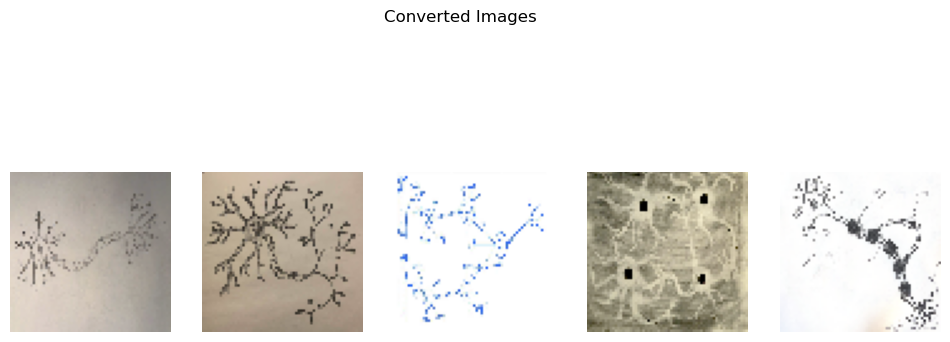

Final dataset shape: (41, 64, 64, 3)
data saved


In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Folder containing images
#folder_path = "/Users/ffedele3/Downloads/Van_Gogh_data_images/VincentVanGogh/Arles"
folder_path = "/Users/ffedele3/Downloads/NEURON_DRAWING"


target_width, target_height = 64, 64  # Desired image size

# List to store processed images
image_data = []

# Read and process images
for filename in os.listdir(folder_path):
    img_path = os.path.join(folder_path, filename)
    
    print(f"\rProcessing: {filename}", end="", flush=True)
    
    # Read image
    img = cv2.imread(img_path)
    if img is None:
        continue  # Skip if image can't be read
    
    # Convert BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Resize image
    img = cv2.resize(img, (target_width, target_height))
    
    # Normalize to [0,1]
    img = img / 255.0
    
    # Store in list
    image_data.append(img)

# Convert list to NumPy array (num_images, height, width, channels)
data_images = np.array(image_data)

# Plot some sample images
fig, axes = plt.subplots(1, 5, figsize=(12, 5))
for i, ax in enumerate(axes):
    ax.imshow(data_images[i])
    ax.axis("off")
plt.suptitle("Converted Images")
plt.show()

# Print shape of final dataset
print("Final dataset shape:", data_images.shape)  # Expected: (num_images, 64, 64, 3)


# choose filename to save the image data
np.save("NEURON64x64.npy", data_images)
#np.save("CANC.npy", data_images)

print("data saved")

In [ ]:
"""
SELECT IMAGES FROM DATASET WITH COSINE SIMILARITIES to a given image of the set
"""

In [ ]:
import numpy as np
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics.pairwise import cosine_similarity
from scipy.special import rel_entr  # KL divergence


# Function to compute KL Divergence
def kl_divergence(imageA, imageB):
    # Normalize images to be probability distributions (sum to 1)
    imageA = imageA.astype(np.float32)
    imageB = imageB.astype(np.float32)
    
    imageA /= np.sum(imageA)
    imageB /= np.sum(imageB)
    
    return np.sum(rel_entr(imageA, imageB))

# Function to find similar images based on a given metric
def find_similar_images(images, N0, top_k=100, method='cosine'):
    reference_image = images[N0]
    num_images = images.shape[0]
    
    similarities = []
    
    for i in range(num_images):
        if i == N0:
            continue  # Skip comparison with itself
            
        if method == 'cosine':
            score = cosine_similarity(reference_image.reshape(1, -1), images[i].reshape(1, -1))[0, 0]
        elif method == 'kl':
            score = -kl_divergence(reference_image, images[i])  # Lower KL divergence means more similarity
        else:
            raise ValueError("Invalid method. Choose 'cosine', or 'kl'.")
        
        similarities.append((i, score))
    
    # Sort by similarity score (higher is better except for MSE and KL divergence)
    similarities.sort(key=lambda x: x[1], reverse=True)
    
    # Get top-k similar images
    similar_indices = [idx for idx, _ in similarities[:top_k]]
    
    return images[similar_indices], similar_indices


#method == 'cosine'
#method == 'kl' Lower KL divergence means more similarity


N_img = 200 #  top number of images in order of highest similarity
N0 = 21 #2 # 8 #35  # Index of reference image
similar_images = []
indices = []
similar_images, indices = find_similar_images(data_images, N0, top_k=N_img, method='cosine')


fig, ax = plt.subplots(figsize=(3, 3))  # No need for (1,1), just use one axis
img = data_images[N0]
img = (img - img.min()) / (img.max() - img.min())  # Normalize for visualization
ax.imshow(img)
ax.axis("off")
plt.suptitle("Reference Image")
plt.show()  # Ensure the image is displayed

plt.show()

fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    img = similar_images[i]
    img = (img - img.min()) / (img.max() - img.min())  # Normalize for visualization
    ax.imshow(img)
    ax.axis("off")
    plt.suptitle("Similar Images")

plt.show()

# dataset for RBM
similar_images.shape




In [ ]:

# save dataset (from similarity) 

np.save("XXXXXX.npy", similar_images)

print("data saved")